# CSCI 3202 Fall 2025
### Homework 8
### Due December 3, 2025
### 80 points

---


In this assignment, you will learn how to train, validate, and evaluate a Decision Tree Classifier on a given dataset. You will practice using metrics such as accuracy, along with pruning to improve your model's performance.

### Instructions:

This dataset contains information about different attributes of employees from a company. There are 14999 employees records and 10 feature columns.  The columns are:

    satisfaction_level: Employee satisfaction score (1-5 scale).
    last_evaluation: Score on last evaluation (1-5 scale).
    number_project: Number of projects employee worked on.
    average_monthly_hours: Average hours worked in a month.
    time_spend_company: Number of years spent with the company.
    work_accident: If an employee had a workplace accident (yes/no).
    left: If an employee has left the company (yes/no).
    promotion_last_5years: Number of promotions in last 5 years.
    Department: Department of the employee.
    Salary: Annual salary of employee.

For this assignment, your job is to predict the column `left` using a decision tree and then use it to explain to HR why employees stay or leave their job.

In [1]:
# Load libraries needed
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

In [2]:
# Read in the data
hr=pd.read_csv("HR_comma_sep.csv")

In [3]:
# Print the first 10 lines of the dataset for verification
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


**1.  Check the data.**  (10 points) Determine if the number of data points matches your expectation.  Remove any missing values and recode the data to numerical values.  There are more categories for sales than we want.  Combine the following categories for 'sales' to create a new variable with 3 possible levels, sales= 1, technical= 2, support= 3
                            
```python
hr['position'] = hr['sales'].map({'sales':1,'technical':2,'support':3,'IT':3,
                                  'product_mng':1,'marketing':1,'RandD':2,
                                  'accounting':3,'hr':3,'management':3})
```

In [4]:
# any missing values?
print(f"The # of missing values: {hr.isnull().sum()}")


hr['position'] = hr['sales'].map({
    'sales':1, 'product_mng':1, 'marketing':1,
    'technical':2, 'RandD':2,
    'support':3, 'IT':3, 'accounting':3, 'hr':3, 'management':3
})

hr['salary_num'] = hr['salary'].map({'low':1, 'medium':2, 'high':3})

print(hr[['position','salary_num']].isnull().sum())

The # of missing values: satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
position      0
salary_num    0
dtype: int64


**2. Datasets**. (10 points) Create datasets for y and X, where y is the variable we are predicting and X contains the features.
Create a datsets for training and another for testing by randomly selecting 80% of the data for training and 20% for testing.  Call your datasets X_train, y_train, X_test, y_test

In [5]:

hr_no_sales_salary = hr.drop(['sales', 'salary'], axis=1)

X = hr_no_sales_salary.drop('left', axis=1)
y = hr_no_sales_salary['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (11999, 9)
X_test: (3000, 9)
y_train: (11999,)
y_test: (3000,)


**3. Fit Decision Tree.**  (20 points)  Build a decision tree classifier on the training data.  Use the sklearn module or any other modules which create decison trees.  

In [6]:

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**4. Print Tree.** (10 points). Print your decision tree.  How well does the tree fit our data?  Is the tree overfit?  Why or not?

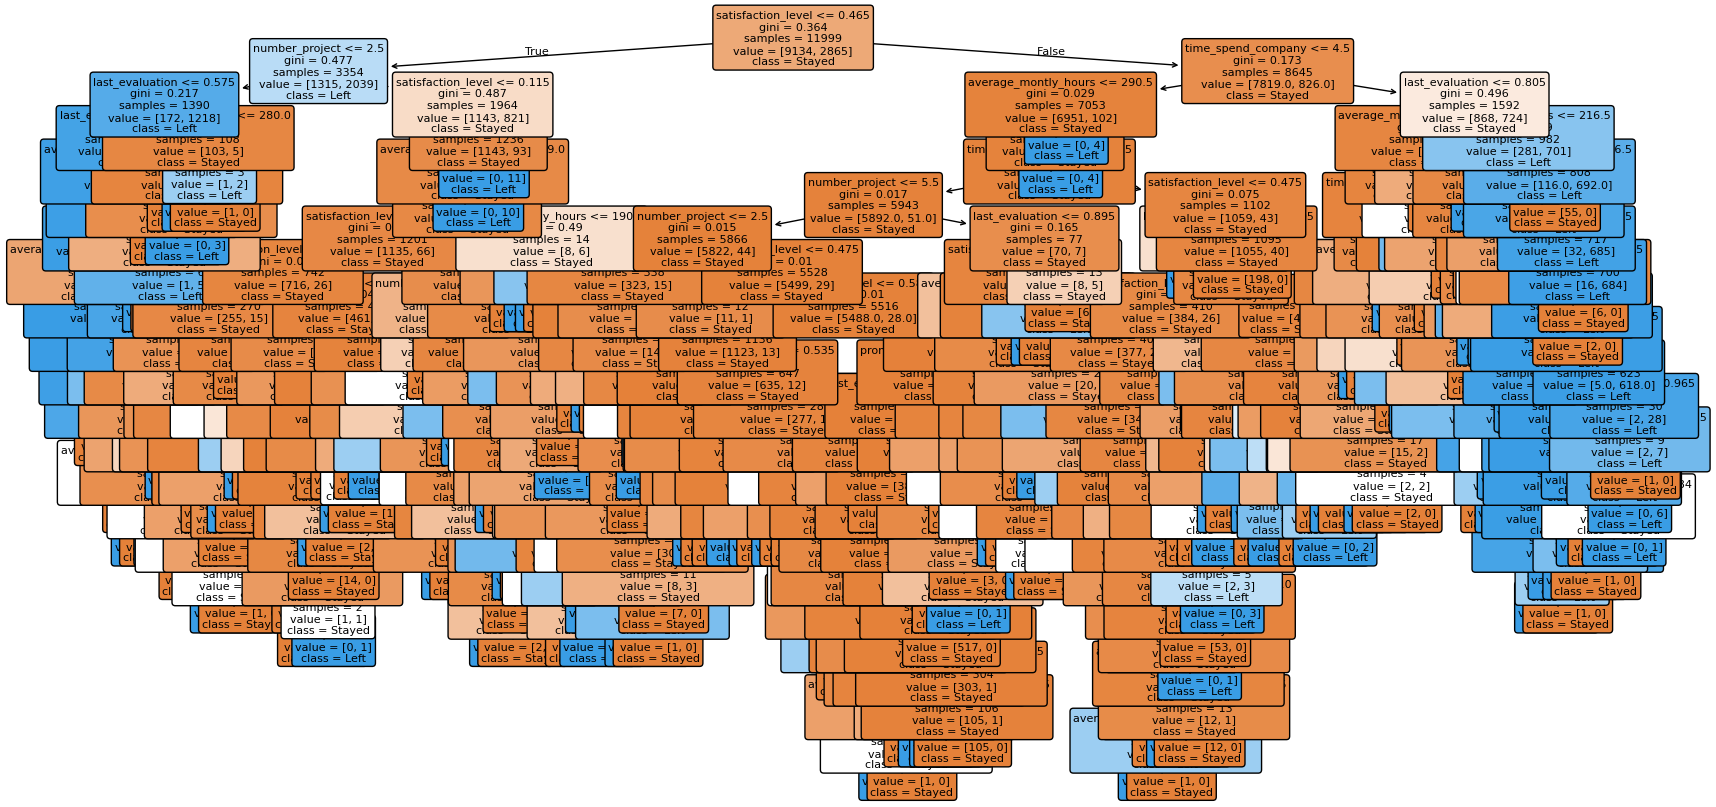

In [7]:
plt.figure(figsize=(20,10))
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['Stayed','Left'],
          rounded=True,
          fontsize=8)
plt.show()


In [8]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Test accuracy:", accuracy)
print("Test precision:", precision)


Test accuracy: 0.975
Test precision: 0.9327846364883402


The decision tree performs very well on the test set. The model boasts a test accuracy of 0.975 and a precision of 0.933, meaning it does an excellent job predicting employee who leave. This means that the tree does an excellent job of fitting the data.

The tree is overfit. The unpruned decision tree is very large and contains many splits/branches which means it's memorizing noise in the training data rather than learning generalized patterns. Decision trees inherently are likely to overfit with no max depth or pruning applied. Despite having high test accuracy, the evidence of overfitting comes from the tree structure expanding upon splits of very small precision and depth.

**5. Improve Tree Fit.** (20 points).  Improve the fit of your decision tree by limiting the depth of the tree.  Explain how well your new tree fits the data.  What depth did you choose for your tree?  Why?

In [9]:
for depth in range(1, 11):
    pruned_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    pruned_clf.fit(X_train, y_train)
    acc = pruned_clf.score(X_test, y_test)
    print(f"Depth {depth}: Test Accuracy = {acc:.4f}")


pruned_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_clf.fit(X_train, y_train)

pruned_pred = pruned_clf.predict(X_test)
pruned_accuracy = accuracy_score(y_test, pruned_pred)
pruned_precision = precision_score(y_test, pruned_pred)

print(f"Pruned tree accuracy: {pruned_accuracy}")
print(f"Pruned tree precision: {pruned_precision}")



Depth 1: Test Accuracy = 0.8163
Depth 2: Test Accuracy = 0.8560
Depth 3: Test Accuracy = 0.9527
Depth 4: Test Accuracy = 0.9673
Depth 5: Test Accuracy = 0.9720
Depth 6: Test Accuracy = 0.9733
Depth 7: Test Accuracy = 0.9747
Depth 8: Test Accuracy = 0.9763
Depth 9: Test Accuracy = 0.9777
Depth 10: Test Accuracy = 0.9770
Pruned tree accuracy: 0.972
Pruned tree precision: 0.9573529411764706


I picked `max_depth = 5` because it had the most sustainable model outcome to model complexity. Each time depth increased, the accuracy increased up until 5, however, post-5, the increases were minimal suggesting diminishing returns with signs of overfitting.

The pruned tree at depth 5 adequately represents the data; the test accuracy reached 0.972 and precision achieved 0.957, which is marginally lower than the unpruned tree but generates a much more sustainable tree that's less complex and easier to explain. The more limited the depth, the less memorizing of noise occurs and the more generalizable the tree is.

**6. Interpret.**  (10 points).  Print your improved decision tree.  Explain how to use this tree to predict a new observation.

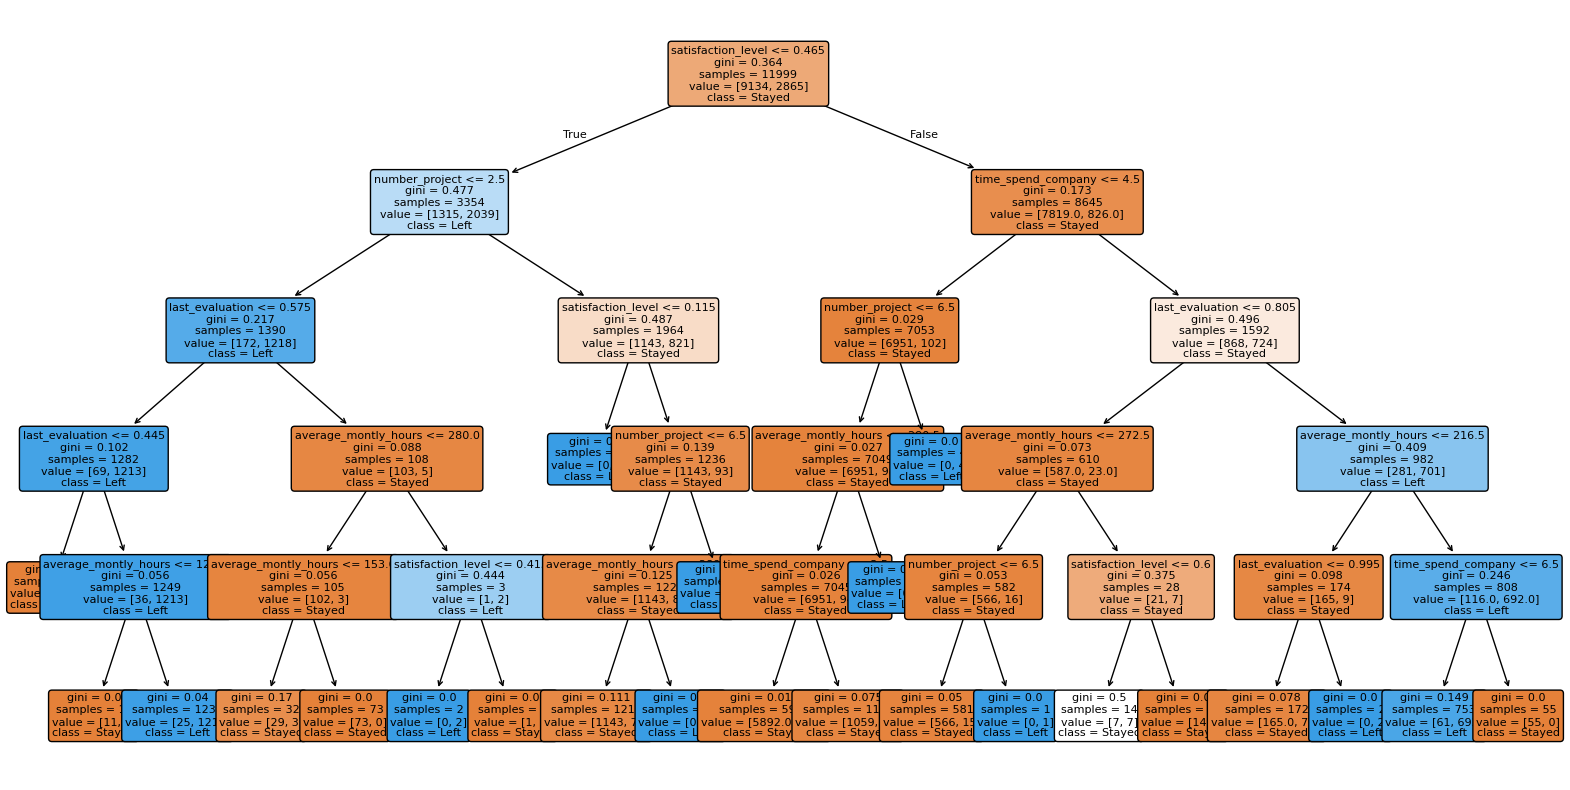

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(
    pruned_clf,
    filled=True,
    feature_names=X.columns,
    class_names=['Stayed', 'Left'],
    rounded=True,
    fontsize=8
)
plt.show()

You begin your prediction by using the root node at the top of the tree and navigating the branches based on a new employee's characteristics. For every split, if, for example, the satisfaction_level or number_project value is lower than or equal to the value provided by the tree cut, you take the left branch. If it is higher than that number, you take the right branch. You continue down this path until you reach a final decision via a leaf node which provides either the class "Stayed" or "Left". Therefore, you can classify any new employee by utilizing this pruned decision tree with these established decision rules.

**7. Explain.**  (10 points). Using this decision tree.  In a paragraph or two, explain to HR why employees stay or leave their jobs.

According to the decision tree, the most predictive variable that outlines whether someone will stay or leave is their satisfaction level. If someone is not satisfied, they will leave - this is clear. Even if they have many projects or low performance, they will still be inclined to leave. Furthermore, this determination is at the top of the tree, suggesting it has the most power over turnover.

Moreover, this model implies that if an employee has a high workload, meaning they possess numerous projects or several monthly hours, or if they have spent a long time in the organization, satisfaction tends to be low, and turnover is high. In contrast, the recommendation shows that these variables are more likely to stay with a company when they have lower workloads and high satisfaction.

Thus, HR should primarily focus on employee satisfaction and workload balance, especially for tenured employees. These are the most obvious determinative factors of turnover according to the decision tree.

### Python Code Hints:
#### You can use the following Python code to get started:
```python
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
```


#### Convert categorical features to numerical values
```python
df['Income'] = df['Income'].map({'50K': 1, '60K': 2, '45K': 3, '80K': 4, '55K': 5, '90K': 6, '65K': 7, '40K': 8, '70K': 9})
```


#### Features and target variable
```python
X = df.drop('BuysComputer', axis=1)
y = df['BuysComputer']
```


#### Split the data into training and test sets
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```


#### Train the Decision Tree Classifier
```python
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
```


#### Evaluate the model on the test set
```python
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')
```


#### Pruning the decision tree
```python
pruned_clf = DecisionTreeClassifier(max_depth=4)
pruned_clf.fit(X_train, y_train)
```


#### Evaluate the pruned model
```python
pruned_accuracy = pruned_clf.score(X_test, y_test)
print(f'Pruned Model Accuracy: {pruned_accuracy}')
```


#### Plot the tree
```python
plt.figure(figsize=(12, 8))
plot_tree(pruned_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()
```